In [74]:
#importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
#importing data
df = pd.read_csv('/content/Indian Startups - Startups1.csv')

In [76]:
#checking top 5 rows of dataset
df.head()

,Company,City,Starting Year,Founders,Industries,Description,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
0,Urban Company,Gurgaon,2014,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan","Apps, Home Services, Marketplace, Service Indu...",Urban is a marketplace for independent contrac...,1001-5000,445920356,12,16
1,Classplus,Noida,2018,"Bhaswat Agarwal, Bikash Dash, Mukul Rustagi, N...","B2B, E-Learning, EdTech, Education, Mobile App...",Classplus is a mobile-first SaaS platform that...,101-250,89506451,10,20
2,Paytm,Noida,2010,"Akshay Khanna, Vijay Shekhar Sharma","E-Commerce, Finance, Financial Services, Inter...",Paytm is a payment gateway that allows users a...,501-1000,32448851,4,4
3,Apna,Mumbai,2019,Nirmit Parikh,"Employment, Human Resources, Recruiting, Staff...",Apna is a professional networking and job-sear...,101-250,93450000,4,6
4,Razorpay,Bengaluru,2014,"Harshil Mathur, Shashank Kumar","Financial Services, FinTech, Payments, Software","Razorpay is a payment acceptance, processing, ...",1001-5000,366600000,7,29


In [77]:
#data size
df.shape

(300, 10)

In [78]:
#checking datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Company              300 non-null    object
 1   City                 300 non-null    object
 2   Starting Year        300 non-null    int64 
 3   Founders             300 non-null    object
 4   Industries           300 non-null    object
 5   Description          300 non-null    object
 6   No. of Employees     300 non-null    object
 7   Funding Amount in $  300 non-null    int64 
 8   Funding Round        300 non-null    int64 
 9   No. of Investors     300 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 23.6+ KB


In [79]:
#checking missing values
df.isna().sum()

,0
Company,0
City,0
Starting Year,0
Founders,0
Industries,0
Description,0
No. of Employees,0
Funding Amount in $,0
Funding Round,0
No. of Investors,0


There are no null values in the dataset


In [80]:
#statistical summary
df.describe()

,Starting Year,Funding Amount in $,Funding Round,No. of Investors
count,300.000000,3.000000e+02,300.000000,300.000000
mean,2013.393333,3.148655e+08,5.986667,10.550000
std,5.139390,1.628802e+09,4.239465,7.530151
min,1984.000000,0.000000e+00,0.000000,0.000000
25%,2012.000000,1.428738e+07,3.000000,5.000000
50%,2015.000000,4.108773e+07,5.000000,9.000000
75%,2016.000000,1.319438e+08,7.000000,14.000000
max,2020.000000,2.476762e+10,25.000000,45.000000


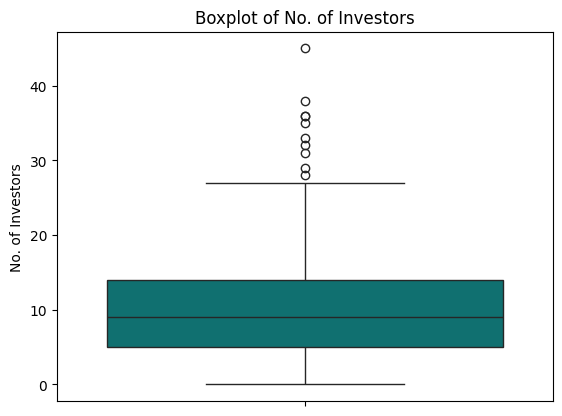

In [81]:
#finding outliers in the "No. of Investors" column
sns.boxplot(df['No. of Investors'],color= 'teal')
plt.title('Boxplot of No. of Investors')
plt.ylabel('No. of Investors')
plt.show()

Here are some outliers in the dataset, we can handle it using inter quartile.

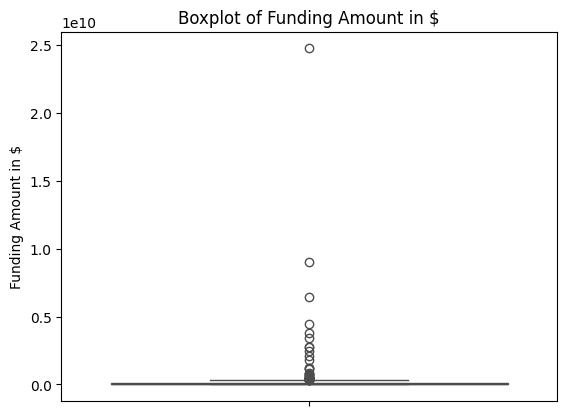

In [82]:
#finding outliers in the "Funding Amount in $" column
sns.boxplot(df['Funding Amount in $'],color='red')
plt.title('Boxplot of Funding Amount in $')
plt.ylabel('Funding Amount in $')
plt.show()

This boxplot reveals a highly skewed distribution of funding amounts.

In [83]:
Funding_by_City = df.groupby('City')['Funding Amount in $'].sum().sort_values(ascending=False).reset_index()
Funding_by_City

,City,Funding Amount in $
0,Mumbai,36055016291
1,Bengaluru,26207212825
2,Gurgaon,15827429512
3,Noida,6134005051
4,Kormangala,3836092733
5,New Delhi,1888117254
6,Chennai,849120965
7,Pune,659265509
8,Faridabad,638829632
9,Hyderabad,557189029


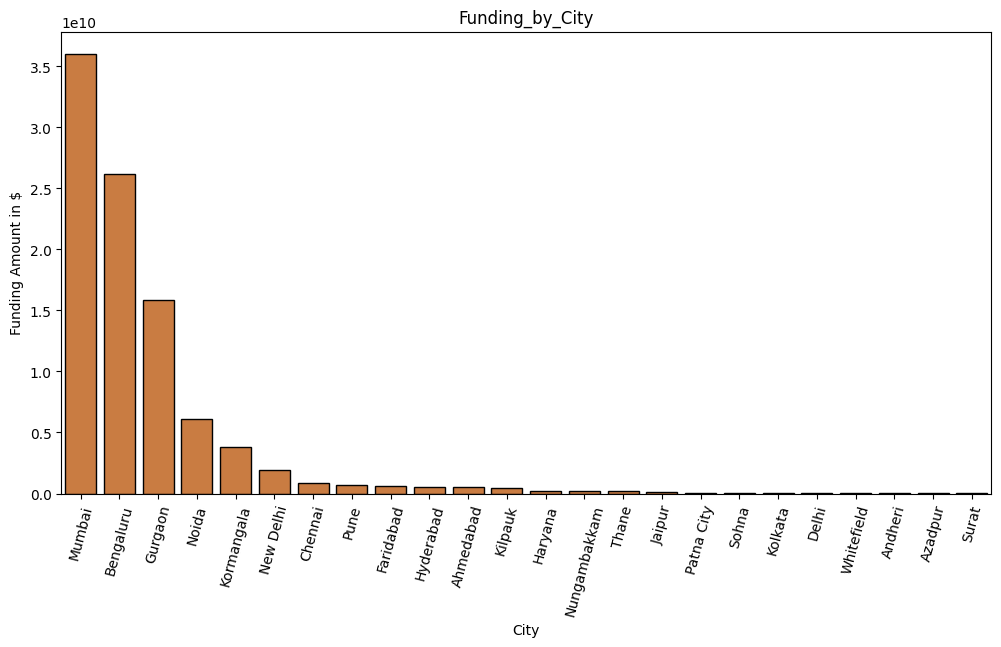

In [84]:
plt.figure(figsize=(12,6))
sns.barplot(data=Funding_by_City,x='City',y='Funding Amount in $',color='#df792c',edgecolor='black')
plt.title('Funding_by_City')
plt.xticks(rotation=75)
plt.show()

In [85]:
Funding_through_years = df.groupby('Starting Year')['Funding Amount in $'].sum()
Funding_through_years

,Funding Amount in $
Starting Year,
1984,456059601
1989,15000000
1990,21445200
1991,129250000
1995,71276176
1996,14100000
1998,423238799
1999,224500000
2000,4880324817


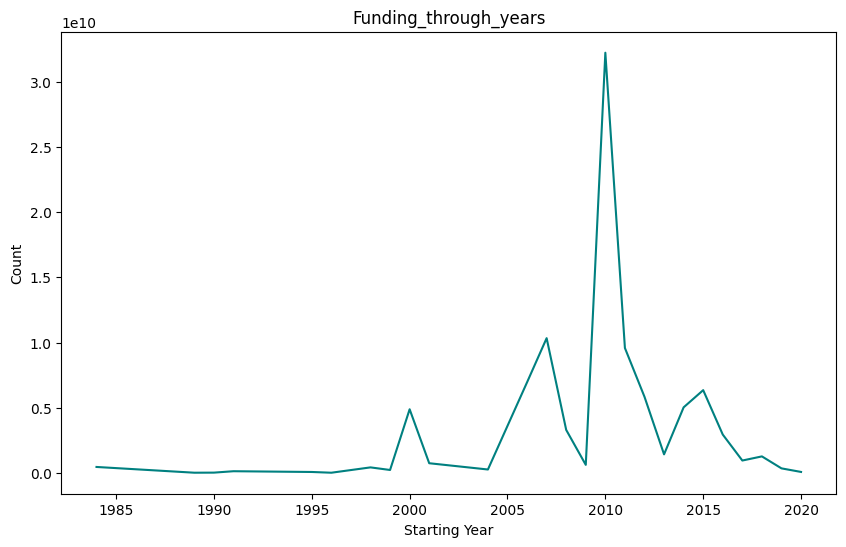

In [86]:
plt.figure(figsize=(10,6))
Funding_through_years.plot(kind='line',color='teal')
plt.title('Funding_through_years')
plt.ylabel('Count')
plt.show()

In [87]:
Top5_industries = df['Industries'].str.split(',').explode().value_counts().head().reset_index()
Top5_industries

,Industries,count
0,Internet,52
1,FinTech,48
2,Financial Services,42
3,E-Commerce,40
4,Software,38


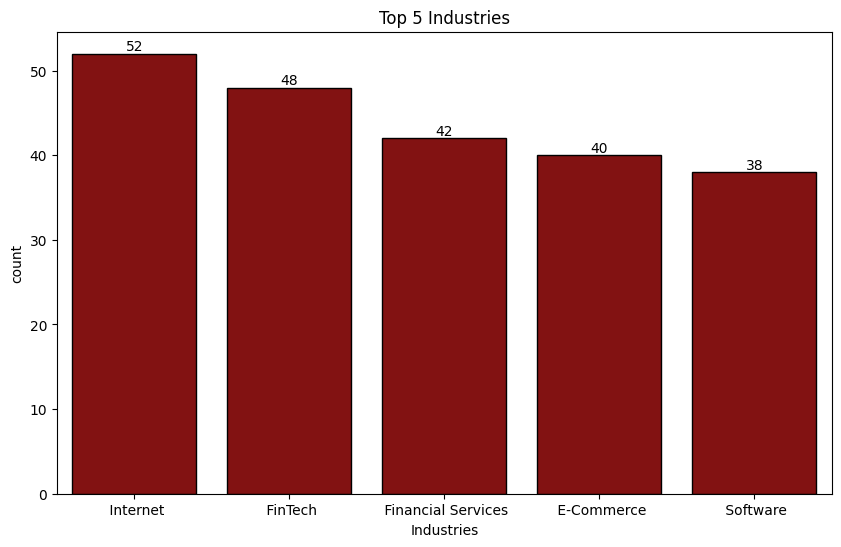

In [88]:
plt.figure(figsize=(10,6))
x= sns.barplot(data=Top5_industries,x='Industries',y='count',color='#940000',edgecolor='black')
plt.title('Top 5 Industries')
for i in x.containers:
  x.bar_label(i)
plt.show()

In [94]:
Total_investor_per_city = df.groupby('City')['No. of Investors'].sum().reset_index()
Total_investor_per_city

,City,No. of Investors
0,Ahmedabad,42
1,Andheri,3
2,Azadpur,3
3,Bengaluru,1491
4,Chennai,55
5,Delhi,17
6,Faridabad,21
7,Gurgaon,540
8,Haryana,31
9,Hyderabad,34


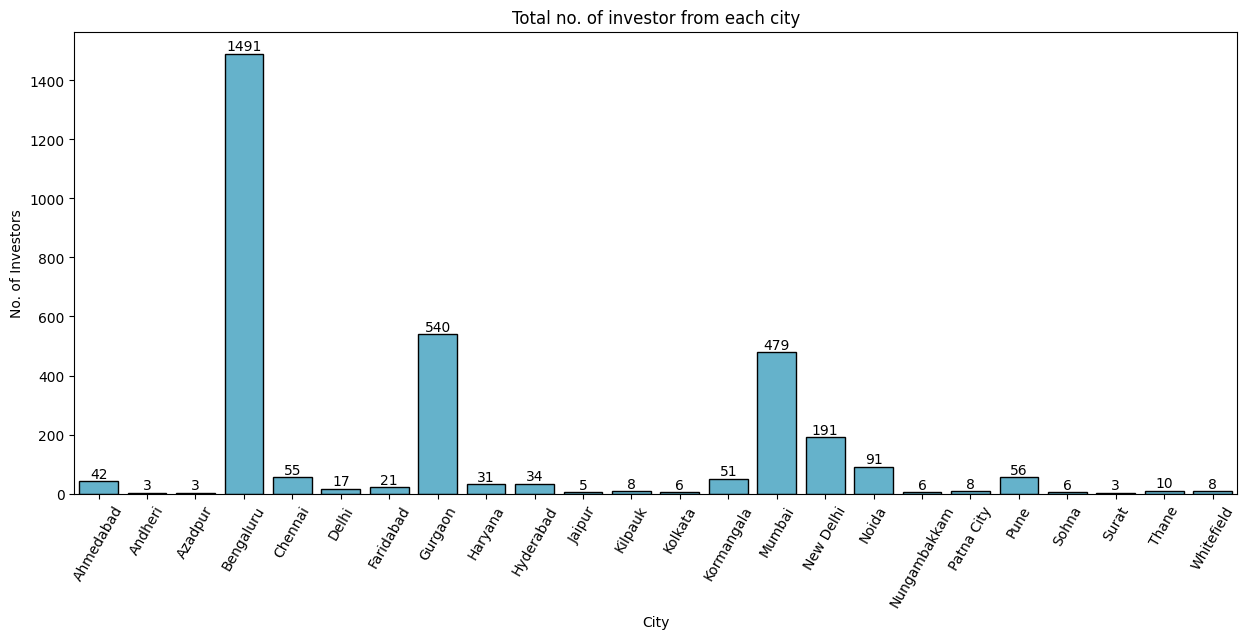

In [102]:
plt.figure(figsize=(15,6))
x = sns.barplot(data=Total_investor_per_city,x='City',y='No. of Investors',color='#54bbdc',edgecolor='black')
plt.title('Total no. of investor from each city')
plt.xticks(rotation=60)
for i in x.containers:
  x.bar_label(i)
plt.show()

In [103]:
investors_from_top10_cities = df.groupby('City')['No. of Investors'].sum().sort_values(ascending=False).reset_index().head(10)
investors_from_top10_cities

,City,No. of Investors
0,Bengaluru,1491
1,Gurgaon,540
2,Mumbai,479
3,New Delhi,191
4,Noida,91
5,Pune,56
6,Chennai,55
7,Kormangala,51
8,Ahmedabad,42
9,Hyderabad,34


<Axes: xlabel='City', ylabel='No. of Investors'>

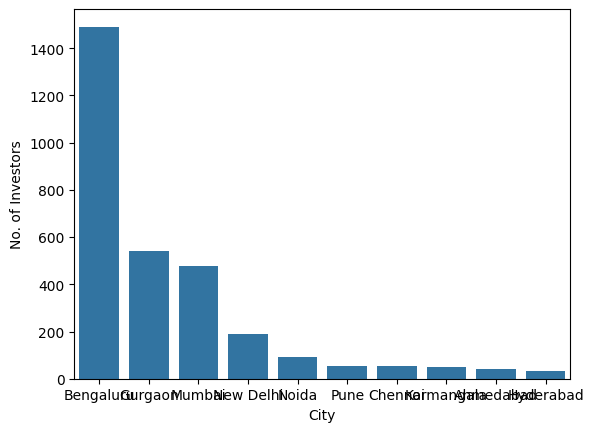

In [104]:
plt.figure(figsize=(10,6))
sns.barplot(data=investors_from_top10_cities,x='City',y='No. of Investors',color='#9c77b6',edgecolor='black')
plt.title('Top 10 cities with ')

In [91]:
df.head().T

,0,1,2,3,4
Company,Urban Company,Classplus,Paytm,Apna,Razorpay
City,Gurgaon,Noida,Noida,Mumbai,Bengaluru
Starting Year,2014,2018,2010,2019,2014
Founders,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan","Bhaswat Agarwal, Bikash Dash, Mukul Rustagi, N...","Akshay Khanna, Vijay Shekhar Sharma",Nirmit Parikh,"Harshil Mathur, Shashank Kumar"
Industries,"Apps, Home Services, Marketplace, Service Indu...","B2B, E-Learning, EdTech, Education, Mobile App...","E-Commerce, Finance, Financial Services, Inter...","Employment, Human Resources, Recruiting, Staff...","Financial Services, FinTech, Payments, Software"
Description,Urban is a marketplace for independent contrac...,Classplus is a mobile-first SaaS platform that...,Paytm is a payment gateway that allows users a...,Apna is a professional networking and job-sear...,"Razorpay is a payment acceptance, processing, ..."
No. of Employees,1001-5000,101-250,501-1000,101-250,1001-5000
Funding Amount in $,445920356,89506451,32448851,93450000,366600000
Funding Round,12,10,4,4,7
No. of Investors,16,20,4,6,29
